<a href="https://colab.research.google.com/github/Danny2964/Danny2964/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Boston-house-price-data.csv to Boston-house-price-data.csv


In [2]:
import pandas as pd

# Assuming your uploaded file name is 'Boston-house-price-data.csv'
data = pd.read_csv('Boston-house-price-data.csv')
data.head()  # Display the first few rows


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data.isnull().sum()  # Identify any columns with missing values


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [4]:
data.describe()  # Summary statistics
data.info()      # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# MEDV will be our target (price), and the other columns will serve as features.
X = data.drop('MEDV', axis=1)  # Features
y = data['MEDV']               # Target (House price)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error

y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)


Linear Regression Mean Squared Error: 24.291119474973478


In [10]:
# Calculate the median price
median_price = data['MEDV'].median()

# Create a new column 'PriceCategory' with 1 if price >= median, else 0
data['PriceCategory'] = data['MEDV'].apply(lambda x: 1 if x >= median_price else 0)


In [11]:
X_class = data.drop(['MEDV', 'PriceCategory'], axis=1)  # Features
y_class = data['PriceCategory']                         # Target (Binary Classification)


In [12]:
from sklearn.linear_model import LogisticRegression

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

clf_model = LogisticRegression(max_iter=1000)
clf_model.fit(X_train_class, y_train_class)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import accuracy_score

y_pred_class = clf_model.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Classification Model Accuracy:", accuracy)


Classification Model Accuracy: 0.8823529411764706


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Use any number of clusters you find appropriate
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_  # Add cluster labels to the data


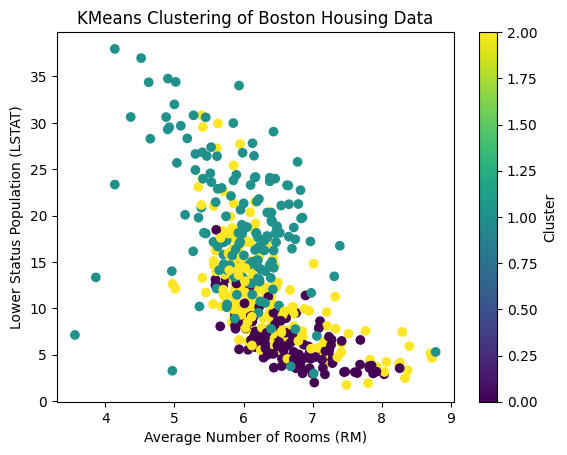

In [16]:
import matplotlib.pyplot as plt

# Example scatter plot (assuming RM and LSTAT are features in your dataset)
plt.scatter(data['RM'], data['LSTAT'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Lower Status Population (LSTAT)')
plt.title('KMeans Clustering of Boston Housing Data')
plt.colorbar(label='Cluster')
plt.show()
